# ENCH 470 Spring 2024 Lecture 6 Assignment

**<font color=red> Problem: </font>** Color scales! Pick a color scale from [Chapter 4](https://clauswilke.com/dataviz/color-basics.html), and track down the hexadecimal color codes for several of those colors. Pick something other than Okabe Ito; I showed you that one in class already. Put these colors in a list, and create a list of the same size with random labels of your choice. Then using create a list of dictionaries, with each label:color combination as a dictionary, with keys as your labels and with values as your colors.

In [6]:
#using ggplot2 hue color scale
color =['#F8766D', '#C49A00','#53B400', '#00C094', '#00B6EB', '#A58AFF', '#FB61D7']
label=['Mono', 'Bi', 'Tri','Tetra','Penta','Hexa','Hepta']
colordict=[{label[0]:color[0]}, {label[1]:color[1]},{label[2]:color[2]},{label[3]:color[3]},{label[4]:color[4]},{label[5]:color[5]},{label[6]:color[6]}]
print (colordict)                                                                                                     
    

[{'Mono': '#F8766D'}, {'Bi': '#C49A00'}, {'Tri': '#53B400'}, {'Tetra': '#00C094'}, {'Penta': '#00B6EB'}, {'Hexa': '#A58AFF'}, {'Hepta': '#FB61D7'}]


**<font color=orange> Extra Credit: </font>** Do the above, but use list comprehension to create the list of dictionaries with just a single line of code.

In [2]:
import pandas as pd
import numpy as np
ThermoProperties = pd.read_csv('ThermoProperties.csv')

**Problem in class:** Slice out all molecules with the string 'iodo' and see what that subset of data looks like

In [3]:
ThermoProperties

,name,molweight,critical temperature (K),acentric factor,boiling point (K)
0,(+)-a-pinene,136.23704,647.00,0.3410,428.65
1,(+)-camphene,136.23704,638.00,0.2960,432.65
2,(-)-a-pinene,136.23704,647.00,0.3410,429.35
3,(-)-b-citronellol,156.26820,656.59,0.6120,498.65
4,(-)-camphene,136.23704,638.00,0.2960,439.95
...,...,...,...,...,...
6026,water,18.01528,647.13,0.3449,373.15
6027,xylenes,106.16740,620.21,0.3170,413.15
6028,zirconium bromide,410.84000,805.00,0.3100,633.15
6029,zirconium chloride,233.03480,778.00,0.2980,604.15


In [6]:
MonoIodoSlice = ThermoProperties[ThermoProperties['name'].str.contains('-iodo')]
DiIodoSlice = ThermoProperties[ThermoProperties['name'].str.contains('diiodo')]
TriIodoSlice = ThermoProperties[ThermoProperties['name'].str.contains('triiodo')]

**<font color=red> Problem: </font>** We want to show trends among halogenated alkanes, but slicing using the 'iodo' strings above isn't perfect. Modify the above DataFrames (or generate new ones) to remove and/or reclassify molecules that don't belong.

In [65]:
IodoSlice = ThermoProperties[ThermoProperties['name'].str. contains ('iodo' )]
BetterIodo = IodoSlice [IodoSlice ['name'].str. contains ('ane')]
ChloroSlice = ThermoProperties [ThermoProperties ['name'].str.contains('chloro')]
BetterChloro = ChloroSlice [ChloroSlice ['name'].str. contains ('ane')]
BromoSlice = ThermoProperties [ThermoProperties ['name'].str.contains ('bromo')]
BetterBromo = BromoSlice [BromoSlice ['name'].str. contains ('ane' )]
FluoroSlice = ThermoProperties [ThermoProperties['name'].str.contains('fluoro')]
BetterFlouro = FluoroSlice [FluoroSlice['name'].str.contains( 'ane')]

**Problem in class:** Figure out a way to show trends among different halogenated alkanes, in a figure that shows the molecular weight, the boiling point, and the critical temperature.

**<font color=red> Problem: </font>** (6 points) I anticipate that we won't completely finish the previous in-class problem (trends among halogens) before time is up. Finish this figure, and upload your code and attach the .html file generated.

In [104]:
import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace (go.Scatter (x = BetterIodo ['molweight'], y = BetterIodo['boiling point (K)'], name = 'Iodine Alkanes', mode='markers', 
                            marker_symbol = 'triangle-up', marker_color =BetterIodo['critical temperature (K)'],
                           hovertemplate = '<extra></extra>' + '%{text}' + '<br>molecular weight (amu): %{x}', text= BetterIodo['name']))
fig.add_trace(go.Scatter (x = BetterChloro['molweight'], y = BetterChloro['boiling point (K)'], name ='Chlorine Alkanes', mode='markers',
                         marker_symbol = 'square', marker_color = BetterChloro['critical temperature (K)'],
                        hovertemplate = '<extra></extra>'  + '%{text}' + '<br>molecular weight (amu): %{x}', text= BetterChloro['name']))
fig.add_trace(go.Scatter (x = BetterBromo['molweight'], y = BetterBromo['boiling point (K)'], name = 'Bromine Alkanes', mode='markers',
                        marker_symbol = 'circle', marker_color = BetterBromo['critical temperature (K)'],
                      hovertemplate = '<extra></extra>'  + '%{text}' + '<br>molecular weight (amu): %{x}', text = BetterBromo['name']))
fig.add_trace(go.Scatter(x = BetterFluoro['molweight'], y = BetterFluoro['boiling point (K)'], name = 'Flourine Alkanes',mode='markers', 
                        marker_symbol = 'diamond', marker_color = BetterFluoro['critical temperature (K)'],
                        marker_colorbar=dict (title='T<sub></sub> (K)'), 
                      hovertemplate = '<extra></extra>'+ '%{text}' + '<br>molecular weight (amu): %{x}', text = BetterFluoro['name']))
 
fig.update_layout (title = 'Trends Among Halogenated Alkanes', xaxis_title = 'molecular weight (amu)', yaxis_title ="Boiling point (K)", 
                   legend=dict( y=1, x=0.001))
fig.show() 
fig.write_html('ANinteractiveplot1.html')


**<font color=red> Problem: </font>** We're going to be studying linear regression in the coming weeks. Some example data are shown below. Show this data using plotly.

Upload your code and attach the .html file generated.

I have included a representative figure in matplotlib.

In [91]:
xdata = np.array([0,1,2,3,4,5])
ydata = np.array([0.1,0.2,0.3,0.5,0.8,2.0]) # Points for scatter (plot as scatter)
ypredicted = np.array([0, 0.2, 0.4, 0.6, 0.8, 1]) # Predicted points from linear regression (plot as line)

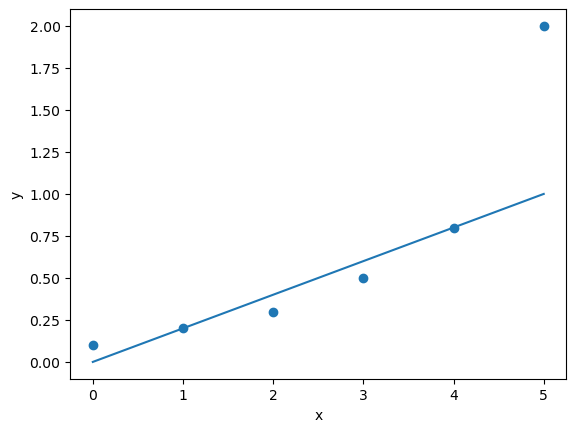

In [103]:
import matplotlib.pyplot as plt

plt.scatter(xdata,ydata)
plt.plot(xdata,ypredicted)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

**<font color=orange> Extra credit: </font>** Show in the hovertext four values (with labels): xdata, ydata, ypredicted, and the absolute difference between ydata and ypredicted.